In [1]:

%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

In [2]:
#%matplotlib widget          # Run for interactive plots with jupyter lab

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats
import statsmodels.api as sm

import matplotlib
#matplotlib.use('nbagg')         # Doesn't work with jupyter lab
import matplotlib.pyplot as plt

# Continuous distributions

Before we describe the most heavily used continuous distributions in statistics, we start with a quick summary of the gamma function, $\Gamma(t) \equiv \int_0^\infty y^{t-1} e^{-y} dy$ Some properties are
$$
\begin{split}
\Gamma(t+1) & = t\;\Gamma(t) \\
\Gamma(1) &= 1 \\
\Gamma(\frac{1}{2}) &= \sqrt{\pi}
\end{split}
$$

The moment generating function $M_X(t) \equiv E(e^{tX})$ is useful for certain proofs. It is an alternative way of characterizing the entire distribution, since
$$
E(X^n) =  \frac{d^n M_X}{dt^n}\bigg\rvert_{t=0}
$$
The moment generating function, if it exists, is unique. This helps us identify distributions of combinations of random variables by manipulating their moment generating functions.

## Normal distribution

$$f_X(x;\mu,\sigma) = \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{(x-\mu)^2}{2\sigma^2}} \qquad \qquad x \in (-\infty, \infty)$$

Moment generating function:
$$
M_X(t) = \frac{1}{\sqrt{2\pi}\sigma} \int_{-\infty}^{\infty} e^{tx}\; e^{-\frac{(x-\mu)^2}{2\sigma^2}} dx = e^{\mu t + \frac{\sigma^2 t^2}{2}} 
$$

Expectation and variance:
$$
\begin{split}
\mu_X &= \mu \\
\sigma_X^2 &= \sigma^2
\end{split}
$$

Standard normal: $\mu=0$ and $\sigma=1$
$$f_X(x;0,1) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}$$

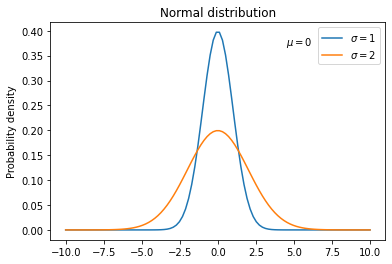

In [8]:
# Density

fig = plt.figure()
ax = fig.add_subplot(111,title="Normal distribution",ylabel="Probability density")
x = np.linspace(-10,10,100)     # Generates 100 evenly spaced numbers in the interval [-10,10]

for sigma in [1,2]:
    _=plt.plot(x,stats.norm.pdf(x,loc=0,scale=sigma),label=r"$\sigma=$"+str(sigma))
    _=plt.legend()
    
_=plt.text(4.5,0.37,r"$\mu=0$")


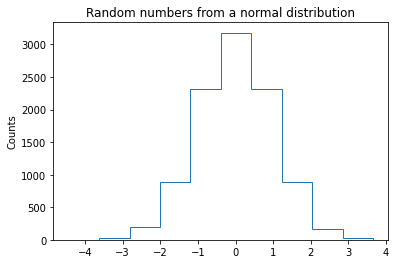

In [4]:
# Normal random numbers
fig = plt.figure()
ax = fig.add_subplot(111,title="Random numbers from a normal distribution",ylabel="Counts")
x=stats.norm.rvs(size=10000)
_=plt.hist(x,histtype='step')


## Gamma distribution

$$
\begin{split}
f_X(x;\alpha,\beta) &= N_{\alpha,\beta}\; x^{\alpha-1}\; e^{-\beta x} \qquad\qquad x \in [0,\infty) \\
 N_{\alpha,\beta} &= \frac{\beta^\alpha}{\Gamma(\alpha)}
\end{split}
$$

Moment generating function:
$$
M_X(t) = E(e^{tX}) = N_{\alpha,\beta} \int_0^\infty x^{\alpha-1}\; e^{-(\beta-t) x} = \frac{\beta^\alpha}{\Gamma(\alpha)} \frac{\Gamma (\alpha)}{(\beta-t)^\alpha} = \frac{1}{(1-\frac{t}{\beta})^\alpha}
$$

Expectation and variance:
$$
\begin{split}
\mu_X &= \frac{d M_X}{dt}\bigg\rvert_{t=0} = \frac{\alpha}{\beta}\\
\sigma_X^2 &= E(X^2) - \mu_X^2 = \frac{d^2M_X}{dt^2}\bigg\rvert_{t=0} - \mu_X^2 = \frac{\alpha(\alpha+1)}{\beta^2} - \left(\frac{\alpha}{\beta}\right)^2 = \frac{\alpha}{\beta^2}
\end{split}
$$

## Chi squared distribution

This is a special case of the Gamma distribution with $\alpha=k/2$ and $\beta=1/2$.

$$
\begin{split}
f_X(x ; k) &= N_k\; x^{\frac{k}{2}-1}\; e^{-\frac{x}{2}}\\
N_k &= \frac{1}{\Gamma \left(\frac{k}{2}\right)\; 2^{\frac{k}{2}}}
\end{split}
$$

The probability density function has support $x \in [0,\infty)$, except if $k=1$ when it becomes undefined at $x=0$.

For the Chi squared distribution,
$$
M_X(t) = (1-2t)^{-\frac{k}{2}}
$$

Expectation and variance:
$$
\mu_X = k \qquad\qquad\qquad \sigma_X^2 = 2k
$$


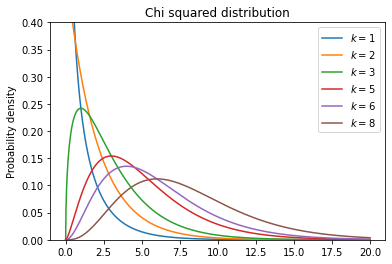

In [5]:
# Chi squared density

fig = plt.figure()
ax = fig.add_subplot(111,title="Chi squared distribution",ylabel="Probability density")
x = np.linspace(0,20,1000)

for k in [1,2,3,5,6,8]:
    _=plt.plot(x,stats.chi2.pdf(x,df=k),label=r"$k=$"+str(k))
    _=plt.legend()
_= plt.ylim(0,0.4)

## F distribution

$$
\begin{split}
f_X(x) &= N_{k_1,k_2}\; x^{\frac{k_1}{2}-1}\; \left (1+\frac{k_1}{k_2}x \right )^{-\;\frac{k_1+k_2}{2}}\\
N_{k_1,k_2} &= \frac{\Gamma\left(\frac{k_1+k_2}{2}\right)}{\Gamma\left(\frac{k_1}{2}\right)\; \Gamma\left(\frac{k_2}{2}\right)} \left(\frac{k_1}{k_2}\right)^{\frac{k_1}{2}}
\end{split}
$$

The probability density function has support $x \in [0,\infty)$, except if $k_1=1$ when it becomes undefined at $x=0$.

Expectation and variance:
$$
\mu_X = \frac{k_2}{k_2-2}\; \text{for}\; k_2 > 2 \qquad\qquad \sigma_X^2 = \frac{2\,k_2^2\,(k_1+k_2-2)}{k_1 (k_2-2)^2 (k_2-4)}\; \text{for}\; k_2 >4
$$

See [Wikipedia entry](https://en.wikipedia.org/wiki/F-distribution). 



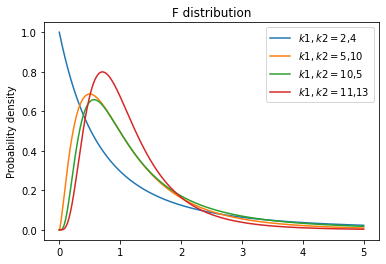

In [6]:
# Density, F distribution

fig = plt.figure(figsize=(6,4))     # Figure size is (width,height) in inches
ax = fig.add_subplot(111,title="F distribution",ylabel="Probability density")
x = np.linspace(0,5,1000)

for k1,k2 in [(2,4),(5,10),(10,5),(11,13)]:
    _=plt.plot(x,stats.f.pdf(x,k1,k2),label=r"$k1,k2=$"+str(k1)+","+str(k2))
    _=plt.legend()


## Student's t distribution

$$
\begin{split}
 f_X(x) &= N_k \left (1+\frac{x^2}{k}\right )^{-\frac{k+1}{2}} \\
 N_k &= \frac{\Gamma \left( \frac{k+1}{2} \right )}{\sqrt{k\pi} \; \Gamma \left (\frac{k}{2} \right )}
\end{split} 
$$

The probability density function has support $x \in (-\infty,\infty)$, is symmetric about zero, and looks similar to the normal density function. Note, however, that it has thicker tails (higher kurtosis) than the  normal distribution.

Expectation and variance:
$$
\mu_X = 0 \qquad\qquad\qquad \sigma_X^2 = \frac{k}{k-2} \; \text{for}\; k >2, \; \infty \;\text{for} \; 1 < k \le 2, \; \text{undefined otherwise}
$$

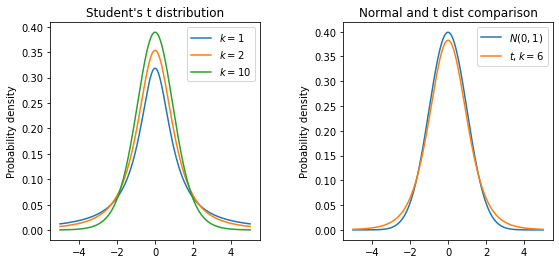

In [7]:
# Density, t distribution

fig = plt.figure(figsize=(9,4))     # Figure size is (width,height) in inches
fig.subplots_adjust(wspace=0.4,hspace=0.4)

x = np.linspace(-5,5,1000)

a1 = fig.add_subplot(121,title="Student's t distribution",ylabel="Probability density")
for k in [1,2,10]:
    _=plt.plot(x,stats.t.pdf(x,df=k),label=r"$k=$"+str(k))
    _=plt.legend()
    
a2 = fig.add_subplot(122,title="Normal and t dist comparison",ylabel="Probability density")
_=plt.plot(x,stats.norm.pdf(x),label=r"$N(0,1)$")
k=6
_=plt.plot(x,stats.t.pdf(x,df=k),label=r"$t,k=$"+str(k))
_=plt.legend()


## Importance

1. **The square of a standard normal random variable is Chi-square distributed**.

    **Proof**

    With $X \sim N(0,1)$, let $Y = X^2$. Then,
    $$
    \begin{split}
    F_Y(y) = P[Y \le y] = P[X^2 \le y] &= \int_{-\sqrt{y}}^{\sqrt{y}}\frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} dx\\
     &=  2 \int_{0}^{\sqrt{y}}\frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} dx\\
         & = \int_{0}^{y}\frac{1}{\sqrt{2\pi}} \frac{e^{-\frac{y'}{2}}}{\sqrt{y'}} dy'
    \end{split}
    $$

    Differentiating the cumulative distribution function with respect to $y$, we get
    $$
    f_Y(y) = \frac{1}{\sqrt{2\pi}} \frac{e^{-\frac{y}{2}}}{\sqrt{y}} = \chi_1^2(y)
    $$
    $$\tag*{$\blacksquare$}$$

2. **The sum of the squares of $n$ standard normal variables is distributed as $\chi^2_n$**.

    **Proof**
    
    This is best proved by using moment generating functions.

    Let $Y = X_1^2 + \dots + X_n^2$, where the set $\{X_i\}$ consists of $n$ independent, identically distributed (iid) standard normal variables. Then,
    $$
    \begin{split}
    M_Y(t) = E(e^{tY}) &= E(e^{t(X_1^2+\dots+X_n^2)})\\
         & = \int e^{t(x_1^2+\dots+x_n^2)}\; f(x_1,\dots,x_n)\; dx_1 \dots dx_n \\
         & = \int e^{tx_1^2}f(x_1) dx_1 \dots \int e^{tx_n^2}f(x_n)dx_n \\
         & = M_{X_1^2}(t) \dots M_{X_n^2}(t) \\
         & = \prod_{i=1}^n (1-2t)^{-\frac{1}{2}}\\
         & = (1-2t)^{-\frac{n}{2}}
    \end{split}
    $$
    The last line implies that $Y \sim \chi_n^2$.
    $$\tag*{$\blacksquare$}$$

3. **The F distribution arises from the ratio of two independent $\chi^2$ variables**.

    Let $U$ and $V$ be $\chi^2$ distributed with $k_1$ and $k_2$ degrees of freedom respectively. Then
    $$
    Y = \frac{U/k_1}{V/k_2}\
    $$
    has the $F$ distribution.
    
    **Proof**
    $$
    F_Y(y) = P(Y \le y) = P(\frac{k_2}{k_1} \frac{U}{V} \le y) = P (U \le \frac{k_2}{k_1} y V)
    $$
    
    $$
    F_Y(y = \frac{1}{\Gamma \left(\frac{k_1}{2}\right)\Gamma \left(\frac{k_2}{2}\right) 2^{\frac{k_1+k_2}{2}}}\int_{v=0}^\infty \left[ \int_{u=0}^{\frac{k_2}{k_1} y v} u^{\frac{k_1}{2}-1} e^{-u/2} du \right] v^{\frac{k_2}{2}-1} e^{-v/2} dv  
    $$
    
    where we have used the fact that $U$ and $V$ are independent and have $\chi^2$ probability densities. Next, we use the substitution
    $$
     u = \frac{k_1}{k_2} v x
    $$
    to get
    $$
    F_Y(y = \frac{1}{\Gamma \left(\frac{k_1}{2}\right)\Gamma \left(\frac{k_2}{2}\right) 2^{\frac{k_1+k_2}{2}}}\int_{v=0}^\infty \left[ \int_{x=0}^y \left(\frac{k_1}{k_2} v x\right)^{\frac{k_1}{2}-1} e^{-\frac{k_1}{k_2} v x/2}\; \frac{k_1}{k_2} v dx \right] v^{\frac{k_2}{2}-1} e^{-v/2} dv 
    $$

    We now switch the order of integration
    $$
    F_Y(y) = \frac{1}{\Gamma \left(\frac{k_1}{2}\right)\Gamma \left(\frac{k_2}{2}\right) 2^{\frac{k_1+k_2}{2}}} \int_{x=0}^y \left(\frac{k_1}{k_2} x\right)^{\frac{k_1}{2}-1} \frac{k_1}{k_2} \left[ \int_{v=0}^{\infty} v^{\frac{k_1+k_2}{2}-1}e^{-\frac{1+k_1 x/k_2}{2} v} dv \right] dx
    $$

    The integral inside the square brackets is a gamma integral. So,
    $$
    F_Y(y) = \frac{1}{\Gamma \left(\frac{k_1}{2}\right)\Gamma \left(\frac{k_2}{2}\right) 2^{\frac{k_1+k_2}{2}}} \int_{x=0}^y \left(\frac{k_1}{k_2} x\right)^{\frac{k_1}{2}-1} \frac{k_1}{k_2} \frac{\Gamma \left(\frac{k_1+k_2}{2}\right)}{\left(\frac{1+k_1 x/k_2}{2}\right)^{\frac{k_1+k_2}{2}}} dx
    $$
    or
    $$
    F_Y(y) = \frac{\Gamma \left( \frac{k_1+k_2}{2}\right)}{\Gamma \left(\frac{k_1}{2}\right)\Gamma \left(\frac{k_2}{2}\right)}\left(\frac{k_1}{k_2}\right)^{\frac{k_1}{2}} \int_{x=0}^y \frac{x^{\frac{k_1}{2}-1}}{\left(1+\frac{k_1}{k_2} x\right)^{\frac{k_1+k_2}{2}}} dx
    $$
    Differentiating this with respect to $y$, we obtain the probability density function
    $$
    f_Y(y) = \frac{\Gamma \left( \frac{k_1+k_2}{2}\right)}{\Gamma \left(\frac{k_1}{2}\right)\Gamma \left(\frac{k_2}{2}\right)}\left(\frac{k_1}{k_2}\right)^{\frac{k_1}{2}} \frac{y^{\frac{k_1}{2}-1}}{\left(1+\frac{k_1}{k_2} y\right)^{\frac{k_1+k_2}{2}}}
    $$
    which is the probability density function for the F distribution.
    $$\tag*{$\blacksquare$}$$

4. **The ratio $T=\frac{Z}{\sqrt{Y/n}}$ where $Z \sim N(0,1)$, $Y \sim \chi_n^2$, and $Z$ and $Y$ are independent, has the t distribution with $n$ degrees of freedom**.

    **Proof**

    Since $Z$ and $Y$ are independent, their joint distribution can be written
    $$
    f_{ZY} = \frac{1}{\sqrt{2\pi}} e^{-\frac{z^2}{2}} \; \frac{1}{2^{n/2}\Gamma (\frac{n}{2})} \; y^{(n/2)-1} e^{-y/2} \quad -\infty < z < \infty \quad y > 0
    $$

    Now,
    $$
    \begin{split}
    F_T(x) &= P(T \le x) = P\left(\frac{Z}{\sqrt{Y/n}} \le x\right) = P\left(Z \le x \sqrt{\frac{Y}{n}} \right)\\
    &= C_n \int_{y=0}^{\infty} y^{(n/2)-1} e^{-y/2} \left[\int_{z=-\infty}^{x\sqrt{y/n}} e^{-\frac{z^2}{2}} dz \right] dy
    \end{split}
    $$

    Using the substitution $z=u\sqrt{\frac{y}{n}}$,
    $$
    \begin{split}
    F_T(x) &= C_n \int_{y=0}^{\infty} y^{(n/2)-1} e^{-y/2} \sqrt{\frac{y}{n}} \int_{u=-\infty}^x e^{- u^2\frac{y}{2n}} \;du\;  dy \\
    &= \frac{C_n}{\sqrt{n}} \int_{u=-\infty}^x \int_{y=0}^{\infty} y^{(n/2)-1} e^{-(1+u^2/n)y/2}\; dy\; du
    \end{split}
    $$
    The integral over $y$ is a gamma function integral. So,
    $$
    \begin{split}
    F_T(x) &= C_n \frac{2^{(n+1)/2}}{\sqrt{n}} \int_{u=-\infty}^x \frac{\Gamma\left(\frac{n+1}{2}\right)}{(1+u^2/n)^{\frac{n+1}{2}}} du \\
    &= \frac{1}{\sqrt{\pi n}}\;\frac{\Gamma\left(\frac{n+1}{2}\right)}{\Gamma\left(\frac{n}{2}\right)} \int_{-\infty}^x \frac{du}{(1+u^2/n)^{\frac{n+1}{2}}}
    \end{split}
    $$
    This means that 
    $$
    f_T(x) = \frac{1}{\sqrt{\pi n}}\;\frac{\Gamma\left(\frac{n+1}{2}\right)}{\Gamma\left(\frac{n}{2}\right)}\; \left(1+\frac{x^2}{n}\right)^{-\frac{n+1}{2}}
    $$
    which is the probability density function for the t distribution.
    $$\tag*{$\blacksquare$}$$
   
5. **The square of a t distributed variable is F distributed**.

    **Proof**
    
    From #4 above, $T_n^2=\frac{Z^2}{Y/n}$. We also know, from #1 above, that $Z^2 \sim\chi^2_1$. Therefore $T_n^2 \sim F(1,n)$.
    $$\tag*{$\blacksquare$}$$